In [ ]:
%matplotlib inline

import pandas as pd
import pylab
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from statsmodels.stats import proportion
from sklearn.linear_model import SGDClassifier


In [ ]:
# Các đặc trưng
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"]

# Đường dẫn đến dữ liệu huấn luyện và kiểm tra
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'



In [ ]:
# Đọc dữ liệu từ URL
original_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*',
                             engine='python', na_values="?")
original_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*',
                            engine='python', na_values="?", skiprows=1)

# Gộp dữ liệu huấn luyện và kiểm tra để chuẩn hóa
num_train = len(original_train)
original = pd.concat([original_train, original_test])
roc_original = original
labels = original['Target']
labels = labels.replace('<=50K', 0).replace('>50K', 1)
labels = labels.replace('<=50K.', 0).replace('>50K.', 1)

In [ ]:
# Loại bỏ cột dư thừa
del original["Education"]

# Loại bỏ biến mục tiêu
del original["Target"]

In [ ]:
def data_transform(df):
    """Chuẩn hóa các đặc trưng."""
    binary_data = pd.get_dummies(df)
    feature_cols = binary_data[binary_data.columns[:-2]]
    scaler = preprocessing.StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(feature_cols), columns=feature_cols.columns)
    return data

data = data_transform(original)
train_data = data[:num_train]
train_labels = labels[:num_train]
test_data = data[num_train:]
test_labels = labels[num_train:]

# Huấn luyện mô hình với SGDClassifier
clf = SGDClassifier(loss='log', learning_rate='constant', eta0=1.5, max_iter=100, tol=1e-3)
clf.fit(train_data, train_labels)
print(clf.n_iter_)

# Dự đoán và tính xác suất dự đoán
predictions = clf.predict(test_data)
scores = clf.predict_proba(test_data)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


6


In [ ]:
# Tạo DataFrame cho các dự đoán và nhãn thực tế
d = {'target': test_labels.values,
     'score': scores,
     'prediction': predictions,
     'race': original_test['Race'],
     'gender': original_test['Sex'],
     'age': original_test['Age'],
     'workclass': original_test['Workclass'],
     'fnlwgt': original_test['fnlwgt'],
     'Education-Num': original_test['Education-Num'],
     'Martial Status': original_test['Martial Status'],
     'Occupation': original_test['Occupation'],
     'Relationship': original_test['Relationship'],
     'Capital Gain': original_test['Capital Gain'],
     'Capital Loss': original_test['Capital Loss'],
     'Hours per week': original_test['Hours per week'],
     'Country': original_test['Country']}

In [ ]:
marginals = pd.DataFrame(data=d, columns=['target', 'score', 'prediction', 'race', 'gender', 'age', 'workclass', 'fnlwgt', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country'])
print(marginals.head(20))

count_1 = np.count_nonzero(predictions)
percentages = [len(predictions) - count_1, count_1]

count_2 = np.count_nonzero(test_labels.values)
percentages_1 = [len(test_labels.values) - count_2, count_2]

    target         score  prediction                race  gender  age  \
0        0  9.999999e-01           1               Black    Male   25   
1        0  1.000000e+00           1               White    Male   38   
2        1  1.000000e+00           1               White    Male   28   
3        1  1.000000e+00           1               Black    Male   44   
4        0  1.648050e-11           0               White  Female   18   
5        0  1.000000e+00           1               White    Male   34   
6        0  1.000000e+00           1               Black    Male   29   
7        1  1.000000e+00           1               White    Male   63   
8        0  1.000000e+00           1               White  Female   24   
9        0  1.000000e+00           1               White    Male   55   
10       1  1.000000e+00           1               White    Male   65   
11       0  1.000000e+00           1               White    Male   36   
12       0  1.000000e+00           1               

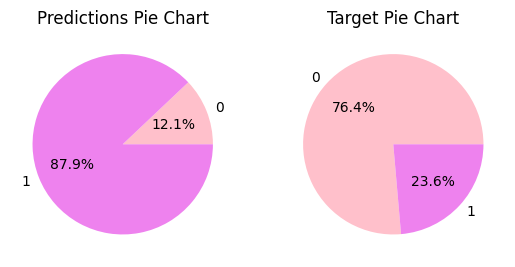

34.389779497573855


In [ ]:
labels = ['0', '1']
colors = ['pink', 'violet']

plt.subplot(1, 2, 1)
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Predictions Pie Chart')
plt.subplot(1, 2, 2)
plt.pie(percentages_1, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Target Pie Chart')
plt.show()

# Tính toán và in độ chính xác của mô hình
accuracy = np.mean(np.equal(predictions, test_labels.values)) * 100
print(accuracy)